## PyTorch Logistic Regression
https://m-alcu.github.io/blog/2018/02/10/logit-pytorch/

In [2]:
import sys, os
import numpy as np
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [12]:
N = 100
D = 2
n2 = int(N/2)
print(n2)

X = np.random.randn(N,D)*2
X.shape

50


(100, 2)

In [13]:
# center the first N/2 points at (-2,-2)
X[:n2,:] = X[:n2,:] - 2*np.ones((n2,D))
# center the last N/2 points at (2, 2)
X[n2:,:] = X[n2:,:] + 2*np.ones((n2,D))

# labels: first N/2 are 0, last N/2 are 1
T = np.array([0]*(n2) + [1]*(n2)).reshape(100,1)

x_data = Variable(torch.Tensor(X))
y_data = Variable(torch.Tensor(T))

In [14]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(2, 1) # 2 in and 1 out
        
    def forward(self, x):
        y_pred = F.sigmoid(self.linear(x))
        return y_pred

In [26]:
# Our model    
model = Model()

criterion = torch.nn.BCELoss(size_average=True)
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [28]:
# Training loop
for epoch in range(1000):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    # print(type(loss.data)) # torch.Tensor
    if loss.data.shape: 
        print(epoch, loss.data[0])
    if loss.data.shape: 
        print(epoch)
    
    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [29]:
for f in model.parameters():
    print('data is')
    print(f.data)
    print(f.grad)

data is
tensor([[1.5725, 0.8478]])
tensor([[-0.0221, -0.0071]])
data is
tensor([-0.1445])
tensor([-0.0113])


In [30]:
w = list(model.parameters())
w0 = w[0].data.numpy()
w1 = w[1].data.numpy()

Final gradient descend: [Parameter containing:
tensor([[1.5725, 0.8478]], requires_grad=True), Parameter containing:
tensor([-0.1445], requires_grad=True)]
--------------------------------------------------
plot the data and separating line


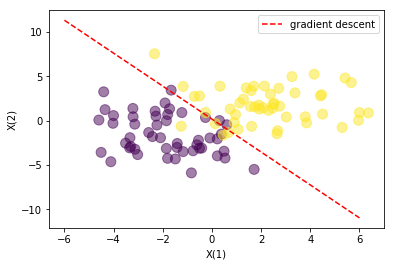

In [36]:
print("Final gradient descend:", w)
print("-"*50)
print("plot the data and separating line")
_ = plt.scatter(X[:,0], X[:,1], c=T.reshape(N), s=100, alpha=0.5)
x_axis = np.linspace(-6, 6, 100)
y_axis = -(w1[0] + x_axis*w0[0][0]) / w0[0][1]
line_up, = plt.plot(x_axis, y_axis,'r--', label='gradient descent')
_ = plt.legend(handles=[line_up])
_ = plt.xlabel('X(1)')
_ = plt.ylabel('X(2)')
_ = plt.show()